In [9]:
import sys
sys.path.append('C:/Users/shjo/Bridge/JNUpack/SO/libs/')
import matplotlib as mpl
# mpl.use('agg')
import os
import numpy as np
import pickle
import pandas as pd
import xarray as xr
from myTrend import myfitting2d_sttcs,myfitting1d_sttcs
from myPlot import  figmaster,myClrbr, dta_colr
import matplotlib.pyplot as plt
from scipy.interpolate import griddata 
import warnings
warnings.filterwarnings('ignore')

pthMO='J:/MDLS_OBS_OHC/Area_data/'
wpth='C:/Users/shjo/OneDrive/mySO/SCP_signal/'

t_rng=[1993, 2017]
varnm='sst'
fig_bool=1

myName='SCP areal mean'

### Preparation ============================================================
wpth=wpth+varnm+'_'+str(t_rng[0])+'_'+str(t_rng[-1])+'/'
try :
    os.mkdir(wpth)
except:
    raise

myMDOB=[pthMO+i for i in os.listdir(pthMO) if i.endswith('.nc')]

myDATA=myMDOB
if t_rng[0]<1992:
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myECCO')]
print(myDATA)

### Read myDATA =============================================================
print('!!! Open files !!!')
myCoefs,myNm,myLat=[],[],[]
lat_rng=[-60,-50]; lon_rng=[180,240]

time_rng=[str(t_rng[0])+'-01',str(t_rng[-1])+'-12']

mySig=[]
for i in myDATA: 
            
    print('!!! Open: '+i+' !!!')
    tmp=xr.open_dataset(i)
    if varnm=='sst':
        mySST = tmp['temp'].loc[dict(lat=slice(lat_rng[0],lat_rng[-1]),lon=slice(lon_rng[0],lon_rng[-1])\
        ,time=slice(time_rng[0],time_rng[-1]),depth=slice(0,10))].mean(dim='depth')       
    else:
        mySST = tmp[varnm].loc[dict(lat=slice(lat_rng[0],lat_rng[-1]),lon=slice(lon_rng[0],lon_rng[-1])\
            ,time=slice(time_rng[0],time_rng[-1]))]
    mySST=mySST.where(mySST<10**30)
    mySST=mySST.mean(dim=['lat','lon'])
    mySST=mySST.rolling(time=12,center=True).mean()
    mySig.append(mySST)
time=mySST.time.values

TIME=pd.date_range('1993-01','2018-01',freq='1M').strftime('%y')
xtick_location = time[::12*2]
xtick_labels = TIME[::12*2]









['J:/MDLS_OBS_OHC/Area_data/myECCO_199201_201712_tsh.nc', 'J:/MDLS_OBS_OHC/Area_data/myEN4_198001_202012_tsh.nc', 'J:/MDLS_OBS_OHC/Area_data/myGECCO_198001_201812_ztshuv.nc', 'J:/MDLS_OBS_OHC/Area_data/myIAP_198001_201812_tshuv.nc', 'J:/MDLS_OBS_OHC/Area_data/myIAP_198001_201812_tshuv_real.nc', 'J:/MDLS_OBS_OHC/Area_data/myISHII_198001_201912_tsh.nc']
!!! Open files !!!
!!! Open: J:/MDLS_OBS_OHC/Area_data/myECCO_199201_201712_tsh.nc !!!
!!! Open: J:/MDLS_OBS_OHC/Area_data/myEN4_198001_202012_tsh.nc !!!
!!! Open: J:/MDLS_OBS_OHC/Area_data/myGECCO_198001_201812_ztshuv.nc !!!
!!! Open: J:/MDLS_OBS_OHC/Area_data/myIAP_198001_201812_tshuv.nc !!!
!!! Open: J:/MDLS_OBS_OHC/Area_data/myIAP_198001_201812_tshuv_real.nc !!!
!!! Open: J:/MDLS_OBS_OHC/Area_data/myISHII_198001_201912_tsh.nc !!!


In [10]:
ORI=pd.read_csv('E:/HEAT/Signals/MEI_ori.csv',header=None)
MEI_index=ORI.values.flatten()

MEI_index[MEI_index<-100]=np.nan
MEI_index=MEI_index[:-8]
len(MEI_index)

520

<xarray.DataArray 'temp' (time: 300)>
array([       nan,        nan,        nan,        nan,        nan,
              nan, 5.95367182, 5.92869114, 5.88466457, 5.88683106,
       5.87166517, 5.87346429, 5.87486296, 5.88163091, 5.88412918,
       5.89563641, 5.91355964, 5.93025596, 5.92461279, 5.92587631,
       5.91475547, 5.87553998, 5.86667144, 5.83905609, 5.81478746,
       5.80923087, 5.81334046, 5.81488313, 5.79318951, 5.76254964,
       5.71645907, 5.64933697, 5.6307844 , 5.6180875 , 5.59372655,
       5.56463043, 5.54778682, 5.51667899, 5.49186657, 5.46587107,
       5.44965129, 5.47008051, 5.49915447, 5.54746226, 5.56447356,
       5.58903765, 5.63675902, 5.70467562, 5.7351203 , 5.76487991,
       5.79032909, 5.80780432, 5.82461258, 5.81893164, 5.83245352,
       5.83631977, 5.84058104, 5.84882892, 5.82222085, 5.77569609,
       5.74347464, 5.70560788, 5.65512772, 5.60602957, 5.55586429,
       5.48887174, 5.40863606, 5.31527236, 5.22569934, 5.1377375 ,
       5.07703568, 5.038

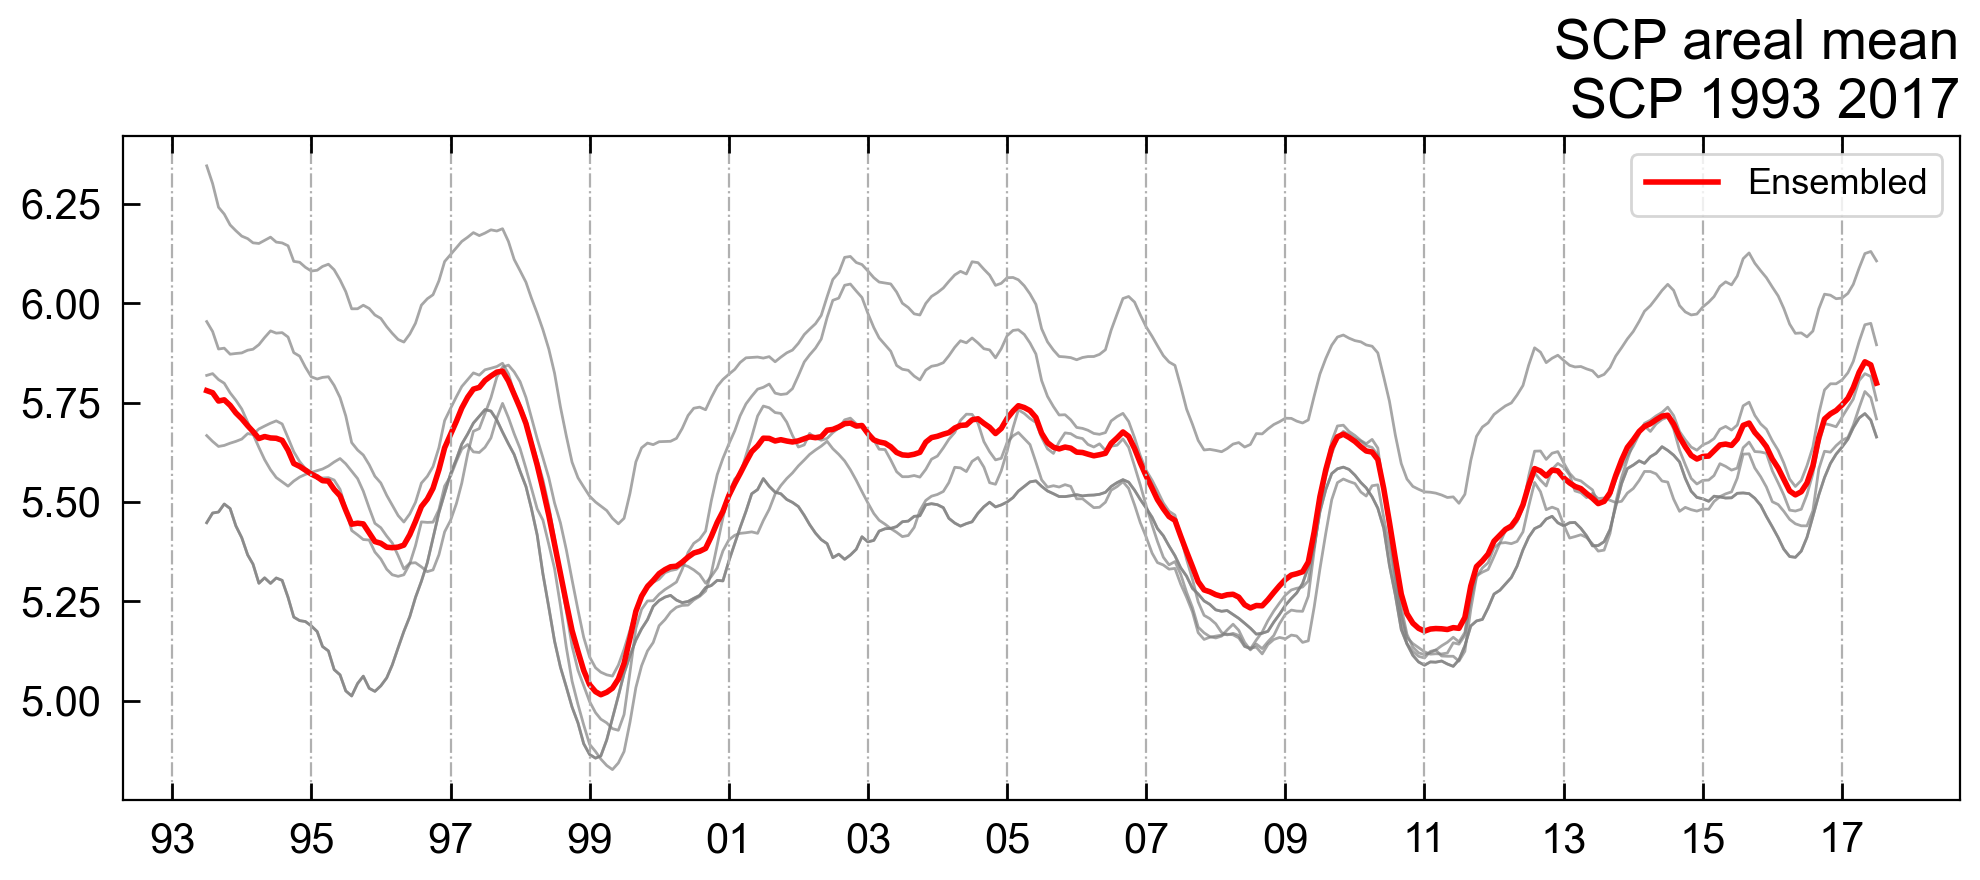

In [11]:
### Figure mySig =============================================================
Label_size = 18
fig, axs = plt.subplots(1,1,figsize=(10,4.5),constrained_layout = True,dpi=200)
for i in mySig:
    print(i)
    axs.plot(time,i,linewidth=1,color='grey',zorder=0,alpha=0.7)
axs.plot(time,np.nanmean(np.array(mySig),axis=0),label='Ensembled',linewidth=2,color='r',zorder=0)
# axs.axhline(y=-55,color='k',linestyle='-.')
# axs.axhline(y=-60,color='k',linestyle='-.')
# axs.axvline(x=0,color='k',linestyle='-')
axs.set_xticks(ticks=xtick_location)
axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
axs.set_title(myName+'\nSCP '+str(t_rng[0])+' '+str(t_rng[-1]),loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'normal'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
# axs.set_xlim([-0.35,0.35])
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size-3, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.legend(fontsize='13')
plt.tight_layout()
if fig_bool:
    myName.replace(' ','_')
    plt.savefig(wpth+'/'+myName.replace(' ','_')+'_Indian'+'_ensembled_'+str(t_rng[0])+'_'+str(t_rng[-1]),bbox_inches='tight')
plt.show()
